<a href="https://colab.research.google.com/github/KarinaKatke/HiRiD/blob/main/getting_started.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import glob
import math
import numpy as np
import os
import pandas as pd
import re
import shutil
import sys
import scipy
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
data_path = '/content/drive/My Drive/HiRID/raw_stage'

In [7]:
# Extract Raw Data
import tarfile

file_path = '/content/drive/My Drive/HiRID/raw_stage/observation_tables_parquet.tar.gz'
extract_path = '/content/observation_tables'

with tarfile.open(file_path, 'r:gz') as tar:
    tar.extractall(path=extract_path)

In [8]:
extracted_files = os.listdir(extract_path)
print(extracted_files)

['observation_tables']


In [9]:
observation_table_path = os.path.join(extract_path, 'observation_tables')

In [10]:
# Listing of all parquet files
all_parquet_files = []
for root, dirs, files in os.walk(observation_table_path):
    for file in files:
        if file.endswith('.parquet'):
            all_parquet_files.append(os.path.join(root, file))

print(all_parquet_files)

['/content/observation_tables/observation_tables/parquet/part-248.parquet', '/content/observation_tables/observation_tables/parquet/part-220.parquet', '/content/observation_tables/observation_tables/parquet/part-114.parquet', '/content/observation_tables/observation_tables/parquet/part-208.parquet', '/content/observation_tables/observation_tables/parquet/part-50.parquet', '/content/observation_tables/observation_tables/parquet/part-102.parquet', '/content/observation_tables/observation_tables/parquet/part-184.parquet', '/content/observation_tables/observation_tables/parquet/part-213.parquet', '/content/observation_tables/observation_tables/parquet/part-209.parquet', '/content/observation_tables/observation_tables/parquet/part-81.parquet', '/content/observation_tables/observation_tables/parquet/part-51.parquet', '/content/observation_tables/observation_tables/parquet/part-148.parquet', '/content/observation_tables/observation_tables/parquet/part-7.parquet', '/content/observation_tables/

In [11]:
#for parquet_file in all_parquet_files:
 #   df = pd.read_parquet(parquet_file)
  #  print(f"Reading file: {parquet_file}")
   # print(df.columns)

## Reading using Pandas
Required python packages are `pandas` and `pyarrow`

### Reading a part

In [12]:
part = 7

In [13]:
# Pandas-Optionen setzen für bessere Anzeige
pd.set_option("display.max_columns", None)        # alle Spalten anzeigen
pd.set_option("display.expand_frame_repr", False) # keine Umbrüche


In [14]:
file_path = os.path.join(
    'observation_tables', 'observation_tables', 'parquet', f'part-{part}.parquet'
)

In [15]:
# Anzeigen der Spaltennmane des parquet-files

df_part = pd.read_parquet(file_path)
print(f"Datei geladen: {file_path}")
print(df_part.columns)


Datei geladen: observation_tables/observation_tables/parquet/part-7.parquet
Index(['datetime', 'entertime', 'patientid', 'status', 'stringvalue', 'type',
       'value', 'variableid'],
      dtype='object')


In [16]:
df_part['value'].count() #zählt wie viele Werte in der Spalte 'value' nicht leer sind, also wie viele Werte existieren

np.int64(2191088)

In [17]:
# die ersten 10 Zeilen anzeigen lassen des parquet files

print(df_part.head(10))

                 datetime               entertime  patientid  status stringvalue type  value  variableid
0 2176-11-05 12:00:00.000 2176-11-05 13:02:46.590         94       8                     0.0    30005080
1 2176-11-05 12:00:00.000 2176-11-05 15:07:09.450         94       8                     0.0    30005110
2 2176-11-05 12:00:00.000 2176-11-05 13:02:46.440         94       8                     0.0    30005010
3 2176-11-05 12:00:00.000 2176-11-05 13:02:46.560         94       8                     0.0    30005075
4 2176-11-05 12:05:00.000 2176-11-05 12:06:42.790         94       8        None       175.0    10000450
5 2176-11-05 12:05:00.000 2176-11-05 12:06:42.790         94       8        None        75.0    10000400
6 2176-11-05 12:06:41.310 2176-11-05 12:06:43.586         94       4                   100.0        4000
7 2176-11-05 12:07:32.130 2176-11-05 12:07:34.853         94       4                   100.0         200
8 2176-11-05 12:07:33.600 2176-11-05 12:08:14.183      

In [18]:
df_part.info()
df_part.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191218 entries, 0 to 2191217
Data columns (total 8 columns):
 #   Column       Dtype         
---  ------       -----         
 0   datetime     datetime64[ns]
 1   entertime    datetime64[ns]
 2   patientid    int32         
 3   status       int16         
 4   stringvalue  object        
 5   type         object        
 6   value        float32       
 7   variableid   int32         
dtypes: datetime64[ns](2), float32(1), int16(1), int32(2), object(2)
memory usage: 96.1+ MB


,0
datetime,0
entertime,0
patientid,0
status,0
stringvalue,37454
type,0
value,130
variableid,0


In [19]:
df_part.describe()


,datetime,entertime,patientid,status,value,variableid
count,2191218,2191218,2.191218e+06,2.191218e+06,2.191088e+06,2.191218e+06
mean,2149-09-03 20:32:48.524234752,2149-09-03 20:41:38.350764032,1.640962e+04,1.322869e+01,1.537623e+02,3.604501e+06
min,2103-02-21 18:40:00,2103-02-21 18:44:18.906000,9.400000e+01,-1.200000e+02,-3.153600e+02,1.000000e+02
25%,2135-01-06 06:59:58.599999488,2135-01-06 07:02:50.490000384,9.731000e+03,8.000000e+00,9.500000e+00,2.000000e+02
50%,2151-08-02 03:54:03.950000128,2151-08-02 03:55:19.253000192,1.675000e+04,1.600000e+01,5.020000e+01,5.100000e+02
75%,2161-08-03 06:00:00,2161-08-03 06:06:55.116000256,2.367800e+04,1.600000e+01,9.700000e+01,4.000000e+03
max,2194-04-17 12:00:16.920000,2194-04-17 12:00:16.920000,3.348800e+04,7.200000e+01,4.560600e+04,3.001001e+07
std,NaN,NaN,8.959669e+03,3.835985e+00,5.221786e+02,9.554818e+06


# Betrachtete Value


In [ ]:
# Die gewünschte variableid setzen
variableid = 300


# Wie viele Einträge hat eine bestimmte Variable?

In [20]:
total_count = 0
variableid = 3845

In [21]:
# zählen wie viel data wir zu einer spezifischen value haben, in diesem parquet file

gefilterte_values = df_part[df_part['variableid'] == variableid]['value']
total_count = gefilterte_values.notna().sum()

print(f"\nGesamtanzahl nicht-NaN-Werte für VariableID {variableid}: {total_count}")
print(gefilterte_values)


Gesamtanzahl nicht-NaN-Werte für VariableID 3845: 15089
69155      1.0
69160      1.0
69175      3.0
69225      3.0
69451      3.0
          ... 
2191127    1.0
2191129    1.0
2191135    1.0
2191139    1.0
2191140    1.0
Name: value, Length: 15089, dtype: float32


In [ ]:
# Zähler initialisieren
gesamt_count = 0

# Durchlaufen aller Parquet-Dateien
for file_path in all_parquet_files:
    print(f"Lade Datei: {file_path}")
    df = pd.read_parquet(file_path)

    print(df.describe())

print(f"\fertighihi")

Lade Datei: /content/observation_tables/observation_tables/parquet/part-1.parquet
                            datetime                      entertime     patientid        status         value    variableid
count                        3682933                        3682933  3.682933e+06  3.682933e+06  3.682667e+06  3.682933e+06
mean   2144-09-03 23:44:27.078426624  2144-09-03 23:53:55.801220096  1.356207e+04  1.296983e+01  1.514988e+02  3.990931e+06
min              2108-05-09 19:35:00            2108-05-09 19:36:05  2.430000e+02 -1.200000e+02 -3.193600e+02  1.000000e+02
25%              2121-07-11 00:02:00  2121-07-11 00:09:00.250000384  3.908000e+03  8.000000e+00  8.000000e+00  2.000000e+02
50%    2139-01-28 11:52:46.709999616  2139-01-28 12:39:54.872999936  1.236300e+04  1.600000e+01  4.010000e+01  4.100000e+02
75%              2166-02-19 21:49:00  2166-02-19 21:51:39.836000256  2.299000e+04  1.600000e+01  9.400000e+01  4.000000e+03
max              2196-05-17 14:19:00     2196-05-1

KeyboardInterrupt: 

In [ ]:
# durch alle Parquet Files gehen und zählen:

# Zähler initialisieren
gesamt_count = 0

# Durchlaufen aller Parquet-Dateien
for file_path in all_parquet_files:
    print(f"Lade Datei: {file_path}")
    df = pd.read_parquet(file_path)

    # Filtern nach der gewünschten variableid
    gefilterte_values = df[df['variableid'] == variableid]['value']

    # Zählen nicht-NaN-Werte in der Spalte "value"
    count = gefilterte_values.notna().sum()
    gesamt_count += count

    print(f"{count} Werte in Datei gefunden.")

print(f"\n Gesamtanzahl nicht-NaN-Werte für VariableID {variableid}: {gesamt_count}")

Lade Datei: /content/observation_tables/observation_tables/parquet/part-1.parquet
24313 Werte in Datei gefunden.
Lade Datei: /content/observation_tables/observation_tables/parquet/part-222.parquet
15504 Werte in Datei gefunden.
Lade Datei: /content/observation_tables/observation_tables/parquet/part-144.parquet
25512 Werte in Datei gefunden.
Lade Datei: /content/observation_tables/observation_tables/parquet/part-236.parquet
24017 Werte in Datei gefunden.
Lade Datei: /content/observation_tables/observation_tables/parquet/part-84.parquet
16467 Werte in Datei gefunden.
Lade Datei: /content/observation_tables/observation_tables/parquet/part-201.parquet
27031 Werte in Datei gefunden.
Lade Datei: /content/observation_tables/observation_tables/parquet/part-219.parquet
29674 Werte in Datei gefunden.
Lade Datei: /content/observation_tables/observation_tables/parquet/part-123.parquet
23439 Werte in Datei gefunden.
Lade Datei: /content/observation_tables/observation_tables/parquet/part-80.parquet


# Tabelle nur mit einer variableid

In [22]:
variableid = 200

In [23]:
# Filter anwenden
filtered_df = df_part[df_part["variableid"] == variableid]

# Nach Zeit sortieren, falls vorhanden
if "timestamp" in filtered_df.columns:
    filtered_df = filtered_df.sort_values("timestamp")

# Ausgabe
print(filtered_df.head(20))

                   datetime               entertime  patientid  status stringvalue type  value  variableid
7   2176-11-05 12:07:32.130 2176-11-05 12:07:34.853         94       4                   100.0         200
12  2176-11-05 12:09:15.070 2176-11-05 12:10:13.746         94      16                   108.0         200
17  2176-11-05 12:10:58.810 2176-11-05 12:12:13.466         94      16                   121.0         200
32  2176-11-05 12:13:36.900 2176-11-05 12:14:13.310         94      16                   104.0         200
34  2176-11-05 12:14:29.280 2176-11-05 12:16:13.030         94      16                   109.0         200
43  2176-11-05 12:17:55.620 2176-11-05 12:18:12.796         94      16                   100.0         200
44  2176-11-05 12:19:40.250 2176-11-05 12:20:12.576         94      16                   100.0         200
50  2176-11-05 12:21:24.020 2176-11-05 12:22:12.203         94      16                   108.0         200
54  2176-11-05 12:22:15.350 2176-11-0

# Statistical Analysis

In [24]:
variableid = 2400

In [25]:
def plot_variable_distribution(df, variableid="2400", weight_variableid="10000480"):
    """
    Plots the distribution of a specific variable (e.g. tidal volume) with optional normalization by weight.

    Args:
        df (pd.DataFrame): DataFrame containing HiRID data
        variableid (str): Variable ID to analyze (default = '3845')
        weight_variableid (str): Variable ID for weight (used for normalization), default = 'vm131'
    """
    # Filter data for the target variable
    var_df = df[df["variableid"] == variableid].copy()
    print(f"Found {len(var_df)} entries for variableid {variableid}")

    if var_df.empty:
        print("No data available for this variable.")
        return

    # Try to normalize by weight if available
    weight_df = df[df["variableid"] == weight_variableid][["patientid", "value"]].rename(columns={"value": "weight"})
    weight_df = weight_df.dropna().drop_duplicates("patientid")

    # Merge weight per patient
    var_df = var_df.merge(weight_df, on="patientid", how="left")

    # Normalize if weight is available
    var_df["normalized_value"] = var_df["value"] / var_df["weight"]
    use_normalized = var_df["normalized_value"].notna().sum() > 0

    # Plotting
    plt.figure(figsize=(10, 6))
    if use_normalized:
        sns.histplot(var_df["normalized_value"].dropna(), bins=30, kde=False)
        plt.xlabel("Value (normalized by weight in ml/kg)")
    else:
        sns.histplot(var_df["value"].dropna(), bins=30, kde=False)
        plt.xlabel("Raw Value")

    plt.title(f"Distribution of Variable ID {variableid}")
    plt.ylabel("Number of Occurrences")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [26]:
plot_variable_distribution(df_part, variableid="2400")


Found 0 entries for variableid 2400
No data available for this variable.


In [ ]:
df_all = pd.concat([pd.read_parquet(file) for file in all_parquet_files])
plot_variable_distribution(df_all, variableid="2400")


In [25]:
#error versuch, da mit vm(...) statt variableid = (Zahl)



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function 1: Plot distribution of Tidal Volume
def plot_tidal_volume_distribution(df, variable_ids=["vm61"], weight_variable_id="vm131"):
    tidal_volume_df = df[df["variableid"].isin(variable_ids)].copy()

    # Optional: Normalize by weight if available
    if weight_variable_id in df["variableid"].unique():
        weight_df = df[df["variableid"] == weight_variable_id][["patientid", "value"]].rename(columns={"value": "weight"})
        tidal_volume_df = pd.merge(tidal_volume_df, weight_df, on="patientid", how="left")
        tidal_volume_df["normalized_tv"] = tidal_volume_df["value"] / (tidal_volume_df["weight"] + 1e-5)
        plot_col = "normalized_tv"
        xlabel = "Tidal Volume [ml/kg]"
    else:
        plot_col = "value"
        xlabel = "Tidal Volume [ml]"

    plt.figure(figsize=(10, 6))
    sns.histplot(tidal_volume_df[plot_col], bins=50, kde=False, color="skyblue")
    plt.title("Distribution of Tidal Volume")
    plt.xlabel(xlabel)
    plt.ylabel("Number of Occurrences")
    plt.grid(True)
    plt.show()

# Function 2: Plot number of tidal volume setting changes per patient
def plot_num_tidal_volume_changes(df, variable_ids=["vm61"]):
    tv_df = df[df["variableid"].isin(variable_ids)].copy()
    tv_df.sort_values(["patientid", "observationtime"], inplace=True)

    def count_changes(group):
        return (group["value"].diff().fillna(0) != 0).sum()

    change_counts = tv_df.groupby("patientid").apply(count_changes)

    plt.figure(figsize=(10, 6))
    sns.histplot(change_counts, bins=30, kde=False, color="salmon")
    plt.title("Number of Tidal Volume Changes per Patient")
    plt.xlabel("Number of Changes")
    plt.ylabel("Number of Patients")
    plt.grid(True)
    plt.show()

# Function 3: Plot variability (standard deviation) of tidal volume per patient
def plot_tidal_volume_variability(df, variable_ids=["vm61"]):
    tv_df = df[df["variableid"].isin(variable_ids)].copy()
    variability = tv_df.groupby("patientid")["value"].std()

    plt.figure(figsize=(10, 6))
    sns.histplot(variability.dropna(), bins=30, kde=False, color="mediumseagreen")
    plt.title("Tidal Volume Variability per Patient")
    plt.xlabel("Standard Deviation of Tidal Volume")
    plt.ylabel("Number of Patients")
    plt.grid(True)
    plt.show()


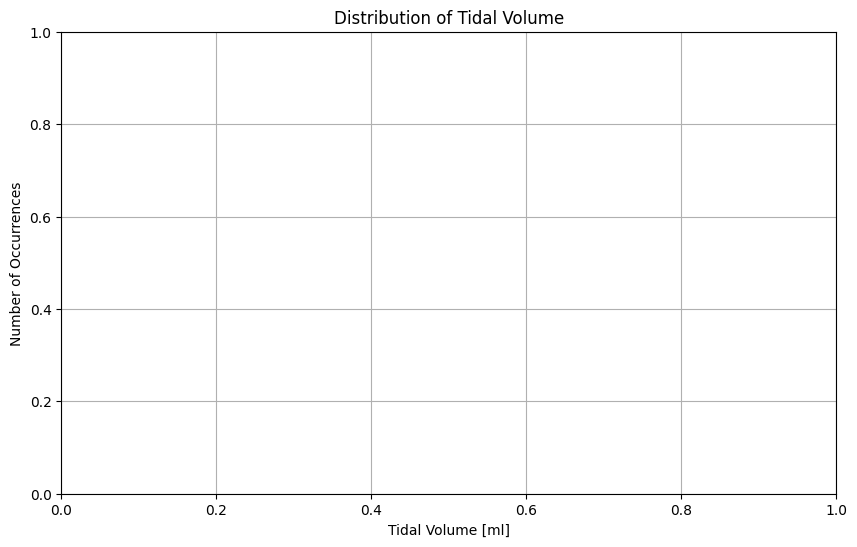

In [27]:
plot_tidal_volume_distribution(df_part)
#plot_num_tidal_volume_changes(df_part)
#plot_tidal_volume_variability(df_part)


# Preprocessing

# Label und Features